# Module 2.1: Pandas

In [ ]:
import pandas as pd
import numpy as np

Pandas is a python package for 'panel data'. It is a library providing high-performance, easy-to-use data structures and data analysis tools for the Python programming language. It is built *on top* of the Numpy package and its key data structure is called the `DataFrame`. `DataFrames` allow you to store and manipulate tabular data in rows of observations and columns of variables.

## Pandas Data Structures

### Series
In Pandas, a `Series` is a one-dimensional array-like object containing a sequence of values (of similar types to NumPy types) and an associated array of data labels, called its `index`. The simplest `Series` is formed from an array of data:


In [ ]:
seed = 42 # Set seed for reproducibility
np.random.seed(seed)

ser = pd.Series(np.random.standard_normal(size=10))

print(ser)

`Series` objects act in many ways like one-dimensional NumPy arrays, and in many ways like dictionaries. A `Series` has a `values` attribute, which is an array of the values it contains, and an `index` attribute, which is an array of the labels of the values it contains. The `index` attribute is a `pandas` `Index` object, which is an array-like structure of type `pd.Index`.


### DataFrame
A Pandas DataFrame is a tabular data structure comprised of rows and columns, akin to spreadsheet data. You can also think of a DataFrame as a group of Series objects that share an index (the column names). Unlike NumPy arrays, which must contain only a single data type, Pandas DataFrames can contain multiple data types.

The columns of a `DataFrame` are a collection of `Series`.  

#### Creating DataFrames
You can create a DataFrame in Pandas using the following constructor:
`pd.DataFrame(data, index, columns)`

The parameters of the constructor are as follows:
* **data**: data takes various forms like `ndarray, series, map, lists, dict, constants` and also another DataFrame.
* **index**: For the row labels, the Index to be used for the resulting frame is Optional Default np.arrange(n) if no index is passed.
* **columns**: For column labels, the optional default syntax is - `np.arrange(n)`. This is only true if no index is passed.

To create a DataFrame, you can pass a dictionary of lists to the DataFrame constructor. The dictionary keys will be used as the column names, and the values should be lists of column data.

**Example: Create a DataFrame from a python dictionary**

In [ ]:
df = pd.DataFrame(
    {
        "A": 1.0, # a constant value is repeated across all rows
        "B": np.arange(10), # a sequence of integers
        "C": np.random.choice(["donorA", "donorB"], 10), # a sequence of strings
        "D": np.random.standard_normal(size=10),
        "E": pd.Categorical(["test", "train"] * 5),
    }
)

print(df)


#### Reading and writing data
Often a more convenient way to create a `DataFrame` is to read a structured dataset directly. Pandas can read a variety of file types using its `pd.read_` methods. Let's read in a dataset of gene expression information from a published study:

    Molyneaux, B. J., Goff, L. A., Brettler, A. C., Chen, H.-H., Brown, J. R., Hrvatin, S., Rinn, J. L. & Arlotta, P. DeCoN: genome-wide analysis of in vivo transcriptional dynamics during pyramidal neuron fate selection in neocortex. Neuron 85, 275–288 (2015).

In this study, the authors sorted for enriched populations of distinct cortical neuron subtypes ('cpn','corticothalamic', and 'subcerebral') using immunolabels specific for each population.  They performed this at 4 different developmental timepoints ('E15','E16','E18', and 'P1'). Using these 12 conditions, they performed RNA-seq to determine the gene expression profile of each population at each timepoint.  The **processed** data is stored in a tab-delimited text file (`GSE63482_Expression_matrix.tsv``), with the first column containing the gene name, and the remaining columns containing the expression level for each condition.

Let's load these data into a `DataFrame` using the `pd.read_csv()` method.  We'll use the `sep` argument to specify that the file is tab-delimited (`\t`).

In [ ]:
data = pd.read_csv('data/GSE63482_Expression_matrix.tsv', sep='\t')

The data have been loaded into a new variable called `data`.  Let's take a look at the first 5 rows of the data using the `.head()` method:


In [ ]:
data.head()

Notice that the first row of the `DataFrame` contains the column names ('index'), and the first column contains the row index ('Unnamed: 0'). 



Pandas can also write `DataFrame` objects to file. For example, we can save the `DataFrame` we just created to a comma-delimited file using the `.to_csv()` method and using the default separator ` ,`:

In [ ]:
data.to_csv('data/dataset_copy.csv', index=False)

### Viewing DataFrames

In python notebooks, when you print a `DataFrame`, the notebook will render it as a nice-looking table. However, when working in a python interpreter, or when working with large datasets, you may want to view only the first or last few rows of the `DataFrame`. You can do this using the `.head()` and `.tail()` methods. 

By default, `.head()` and `.tail()` will return the first and last 5 rows of the `DataFrame`, respectively. You can also specify the number of rows you want to return by passing an integer to the methods. For example, to return the first 10 rows of the `DataFrame`, you would use `df.head(10)`.

In [ ]:
data.head(10)

In [ ]:
data.tail(5)

## Indexing and selecting data
Each row and column has a unique index associated with it. By default, the row indices are integers, starting from 0. The column indices are the column names.

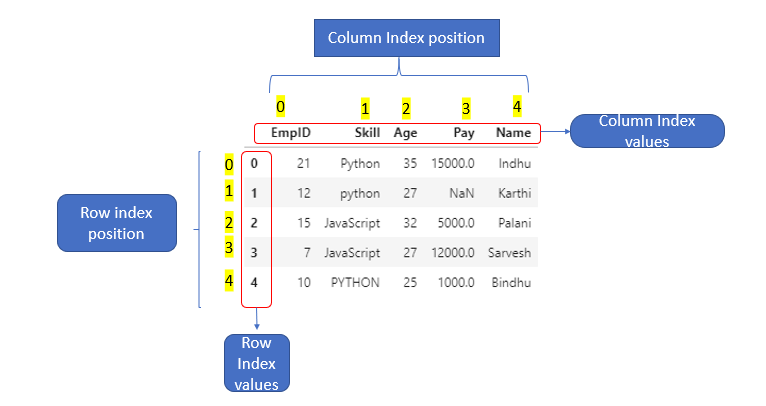

You can choose a custom index for the rows using the `index` argument when creating the `DataFrame`. You can also choose a custom index for the columns using the `columns` argument.

To set a new index for an existing `DataFrame`, use the `.set_index()` method. This method will take a single column name or a list of column names, and will return a new `DataFrame` with the column(s) specified as the new index.

**Example: Set the `gene_id` column as the index for the `data` DataFrame**

In [ ]:
data.set_index('gene_id')

By default, this **only** returns a new `DataFrame` and does not modify the original `DataFrame`. To modify the original `DataFrame`, you can either use the `inplace=True` argument or reassign the new `DataFrame` to the original variable name.

In [ ]:
data = data.set_index('gene_id')

data.head()

You can always 'reset' the index of a `DataFrame` using the `.reset_index()` method. This will return a new `DataFrame` with the index reset to the default integer index. By default, the old index will be added to the `DataFrame` as a new column.

In [ ]:
data = data.reset_index()

### Column Indexing/Selection
You can select a column from a `DataFrame` using the column name in two separate ways. The first is using the `[]` operator and specifying the column name as a string. The second is using the `.` operator and specifying the column name as an attribute of the `DataFrame`.

In [ ]:
data['gene_id']

In [ ]:
data.E18_cpn

You can select multiple columns from a `DataFrame` by passing a list of column names to the `[]` operator.

In [ ]:
data[['gene_id', 'E15_cpn','E16_cpn','E18_cpn','P1_cpn']]

### Row Indexing/Selection
You can select a row from a `DataFrame` using the `.loc[]` operator and specifying the row label as a string. You can also select multiple rows by passing a list of row labels to the `.loc[]` operator.

To demonstrate this, let's first set the `gene_id` column as the index for the `data` `DataFrame`:

In [ ]:
data = data.set_index('gene_id')


In [ ]:
data.loc['Pax6']

In [ ]:
data.loc[['Pax6', 'Sox2','Mef2c']]

You can also select a row from a `DataFrame` using the `.iloc[]` operator and specifying the row index as an integer. You can also select multiple rows by passing a list of row indices to the `.iloc[]` operator.

In [ ]:
data.iloc[500]

In [ ]:
data.iloc[[500, 1450, 15420]]

Finally, we can also select rows using Boolean indexing. This is similar to how we selected rows from a NumPy array. For example, to select all rows where the `E15_cpn` column is greater than 100, we would use the following

In [ ]:
# This conditional statement will return a boolean series of True/False values
data['E15_cpn'] > 100

In [ ]:
# Now pass the boolean series to the dataframe to filter the rows
data[data['E15_cpn'] > 100]

In this manner, we can test columns for certain criteria and select rows based on the results of the test. This is a very powerful way to select rows from a `DataFrame` based on the values in the columns and an operation that you will use frequently.

## Summarizing data
There are a number of built-in pandas methods for getting summary statistics from a `DataFrame`.

The `.max()` and `.min()` methods will return the maximum and minimum values from each column, respectively.

In [ ]:
data['E15_corticothal'].max()

In [ ]:
data['P1_subcereb'].min()

Other relevant methods include `.mean()`, `.median()`, `.std()`, `.var()`, `.sum()`, `.count()`, `.quantile()`, `.argmax()`, and `.argmin()`. Try a few out on the `data` `DataFrame` to see what they do. You can test them on select columns (as above) or on the complete dataset (e.g. `data.mean()`).

Often, we want to perform these summary operations across rows or columns in a `DataFrame`.  You can use the `axis` argument to specify whether you want to perform the operation across rows (`axis=0`) or across columns (`axis=1`).  For example, to get the mean expression level for each gene across all conditions, we would use the following:

In [ ]:
# Get mean expression level for each row (operate _across_ columns)
data.mean(axis=1)

In [ ]:
# Get mean expression level for each condition/column (operate _across_ rows)
data.mean(axis=0)

## Reshaping `DataFrames`
Often, we need to reshape DataFrames to make them easier to work with, or to enable downstream analyses. There are several ways in which data may need to be re-organized.


### Tidy data
An important concept in data science is the idea of 'tidy data'. Tidy data is a standard way of mapping the meaning of a dataset to its structure. A dataset is messy or 'tidy' depending on how rows, columns and tables are matched up with observations, variables and types. In tidy data, each measured variable is a column and each observation is a row. This is called a 'long' format for data.

<img src="images/tidy_rdatasci.png" width=800>
<br clear=left>

The data in `data` are currently in a 'wide' format. 

<img src="images/wide.png" width=800>
<br clear=left>

This is a generally more condensed representation and is a common layout for genomics data. It is easy to visualize relationships across conditions and genes, however it is not in a format that is easy to work with for many downstream analyses including visualization and statistical testing. 

We need to reshape the data into a 'long' format to make it easier to work with.

<img src="images/long.png" width=800>

This 'tidy' format is required for certain plotting functions, but it is generally a good idea to familiarize yourself with these two formats as you will encounter them frequently in data science.

The `pandas` package provides functions to help with the process of tidying data. 

The `.melt()` function reshapes **wide -> long format**. It takes the following arguments:
* `id_vars`: the column(s) to keep the same
* `value_vars`: the column(s) to melt
* `ignore_index`: if False, the resulting DataFrame will include the original index as an `id_var` (default True)

The only **required** argument is `id_vars` which specifies 'identifying' columns for individual observations.

The `melt` function returns a DataFrame with a new column called `variable` that contains the names of the columns that were melted, and a new column called `value` that contains the values of the melted columns.

Here we are specifically using `ignore_index=False` to keep the original index (`gene_id`) as a variable of interest in the melted `DataFrame`.

In [ ]:
data_melted = data.melt(ignore_index=False)

data_melted

Conversely, the `.pivot()` function reshapes **long -> wide format**. It takes the following arguments:
* `index`: the column(s) to keep the same
* `columns`: the column to pivot
* `values`: the column to fill the new columns with

In [ ]:
data_melted.pivot(columns='variable', values='value')

`.pivot()` works here because there are no duplicate values in the combination of `gene_id` and `variable`. If there were, we would need to use the `.pivot_table()` function instead.  

`.pivot_table()` is a more general version of `.pivot()` that can aggregate duplicate values.  This is helpful if you want to summarize your data during the process of reshaping it. `.pivot_table()` adds an argument `aggfunc` that specifies how to aggregate duplicate values.  The default is `aggfunc='mean'`, but you can also use `aggfunc='sum'`, `aggfunc='count'`, `aggfunc='median'`, or write your own aggregation function and use that.

### Grouping data
Pandas also has powerful methods for grouping data based on the values in one or more columns. For example, we can group the melted `data` `DataFrame` by the `variable` column containing the experimental condition using the `.groupby()` method:


In [ ]:
data_melted.groupby('variable')

This returns a `DataFrameGroupBy` object. This object is similar to a `DataFrame`, but it has some special properties. For example, you can use the `.mean()` method on the `DataFrameGroupBy` object to get the mean expression level for each level of the grouping variable.  In this case the condtion mean expression across all genes.


In [ ]:
data_melted.groupby('variable').mean()

## Resources

There is so much more to `pandas` than what is covered in this notebook.  Here are some resources for learning more about `pandas`.  Please take some time to explore this library and familiarize yourself with its capabilities.  It will be a very useful tool for you in your data science journey.

- [Pandas cheat sheet](https://pandas.pydata.org/Pandas_Cheat_Sheet.pdf)
- [10 minutes to pandas](https://pandas.pydata.org/docs/user_guide/10min.html)
- [Pandas Input/Output](https://pandas.pydata.org/pandas-docs/stable/reference/io.html)
- [Pandas: DataFrames](https://pandas.pydata.org/pandas-docs/stable/reference/frame.html)
- [Pandas Illustrated](https://archive.ph/TqMeG)